# Distanz-Meshes zwischen Nachbarn zeichnen
Bei der Untersuchung von Nachbarschaftsbeziehungen zwischen Zellen, z. B. um festzustellen, ob Zellen miteinander kommunizieren können, sind ihre Abstände zueinander relevant. Wir können diese mit Hilfe von Distanz-Meshes visualisieren.

In [1]:
import pyclesperanto_prototype as cle
from numpy import random
from skimage.io import imread

Wir verwenden einen Datensatz, der von [Heriche et al.](https://doi.org/10.1091/mbc.E13-04-0221) veröffentlicht wurde und unter [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/) lizenziert ist. Er ist in der [Image Data Resource](https://idr.openmicroscopy.org/webclient/img_detail/179719/) verfügbar.

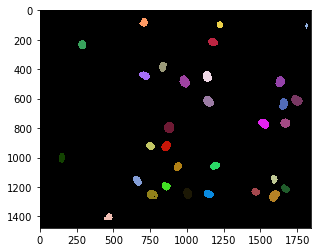

In [2]:
raw_image = imread("../../data/plate1_1_013 [Well 5, Field 1 (Spot 5)].png")[:,:,0]

nuclei = cle.voronoi_otsu_labeling(raw_image, spot_sigma=15)

cle.imshow(nuclei, labels=True)

Ein Mesh kann beispielsweise zwischen proximalen Nachbarn gezeichnet werden, also Zellkernen, die näher als ein bestimmter maximaler Abstand zueinander sind.

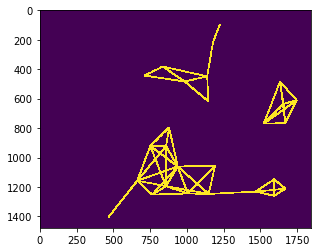

In [3]:
max_distance = 320

proximal_neighbor_mesh = cle.draw_mesh_between_proximal_labels(nuclei, maximum_distance=max_distance)

# Wir machen die Linien für Visualisierungszwecke etwas dicker
proximal_neighbor_mesh = cle.maximum_box(proximal_neighbor_mesh, radius_x=5, radius_y=5)

cle.imshow(proximal_neighbor_mesh)

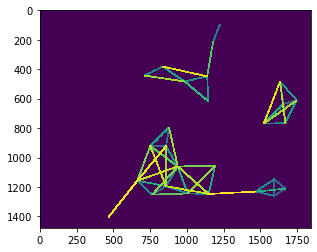

In [4]:
proximal_distance_mesh = cle.draw_distance_mesh_between_proximal_labels(nuclei, maximum_distance=max_distance)

# Wir machen die Linien für Visualisierungszwecke etwas dicker
proximal_distance_mesh = cle.maximum_box(proximal_distance_mesh, radius_x=5, radius_y=5)

cle.imshow(proximal_distance_mesh)

## Distanz-Meshes im Detail
Um ein Distanz-Mesh zu zeichnen, müssen wir eine Distanzmatrix, eine abstrakte Darstellung der Abstände aller Objekte zueinander, mit einer Nachbarschaftsmatrix kombinieren, die darstellt, welche Zellen Nachbarn sind.

Wir beginnen mit der Distanzmatrix.

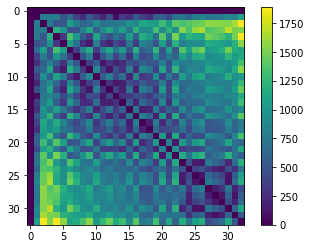

In [5]:
centroids = cle.centroids_of_background_and_labels(nuclei)

distance_matrix = cle.generate_distance_matrix(centroids, centroids)

# Wir ignorieren Abstände zum Hintergrundobjekt
cle.set_column(distance_matrix, 0, 0)
cle.set_row(distance_matrix, 0, 0)

cle.imshow(distance_matrix, colorbar=True)

Als nächstes sollten wir eine Matrix erstellen, die für jeden Zellkern (von links nach rechts) darstellt, welches seine n nächsten Nachbarn sind.

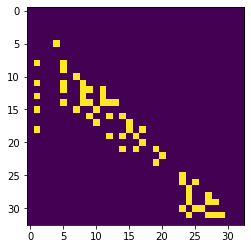

In [6]:
proximal_neighbor_matrix = cle.generate_proximal_neighbors_matrix(distance_matrix, max_distance=max_distance)

cle.imshow(proximal_neighbor_matrix)

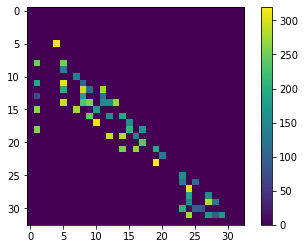

In [7]:
distance_touch_matrix = distance_matrix * proximal_neighbor_matrix

cle.imshow(distance_touch_matrix, colorbar=True)

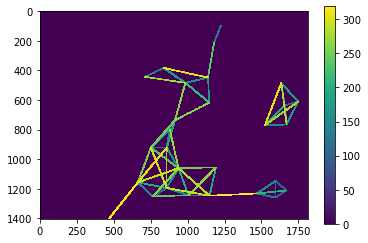

In [8]:
distance_mesh1 = cle.touch_matrix_to_mesh(centroids, distance_touch_matrix)

# Wir machen die Linien für Visualisierungszwecke etwas dicker
distance_mesh1 = cle.maximum_box(distance_mesh1, radius_x=5, radius_y=5)

cle.imshow(distance_mesh1, colorbar=True)

Um zu überprüfen, ob die Zellkerne von oben immer noch die Zentroide des Meshes sind, fügen wir beide in einem Bild zusammen.

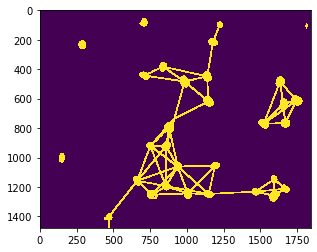

In [9]:
visualization = cle.maximum_images(nuclei > 0, distance_mesh1 > 0)

cle.imshow(visualization)